# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [X] NO - keep private

# Overview

Our goal for this project was to gain a more intimate understanding of the relationship between social media and mental health in people aged fourteen to twenty eight. We designed a survey that we distributed amongst our personal social networks. The survey asked users how much time they spend on social media applications, how many they use, and how they describe their current mental health status. We implemented the information into an organized data set which we meticulously analyzed in order to accept or reject our null hypothesis. With statistical analysis, data visualizations, and logistic regression we demonstrate that there is a correlation between the two

# Names

- Daniela Molina
- Gabriel Beal
- Marc Isaia
- Haoxuan Cui

<a id='research_question'></a>
# Research Question

There are an ample amount of teenagers and young adults (aged 14-28) who use prevalent social media applications in the United States (Facebook, Instagram, Twitter, Snapchat, Reddit.) There are also a rising number of self-reported mental health cases reported within the same population. Taking those matters into consideration, does extensive social media usage (2+ hours/day) by an individual generate a higher likelihood of self-reporting a mental health disorder such as Anxiety or Depression?

<a id='background'></a>

## Background & Prior Work

We reached a unanimous consensus to investigate this question when we realized that a quote from the netflix documentary “The Social Dilemma” had resonated with each of us. Tristan Harris, a well known computer scientist who formerly worked at google stated that “software developers design apps to be as addictive as slot machines.” This made us wonder what impact that has on the mental health of people in our age group. Social media applications can act as echo chambers for opinions, reinforcement mechanisms, and primary communication platforms. They earn our attention with clever features such as the like button or the endless scroll. We have become programmed to seek gratification from social media apps, send and receive notifications, and then ultimately continue this feedback loop. Seeing how this is such a new phenomenon we thought its effect on our mental health is likely not yet completely understood.  Our project was inspired by a genuine concern in trends of mental health and cell phone usage. We were a part of the generation that grew up with social media and began using it as early as the sixth grade all the way until the present day. The following four sources were critical for familiarizing ourselves with the work that's already been done in the field and what gaps there are left to fill.
 

References:
- 1) [The Social Dilemmma](https://www.netflix.com/title/81254224)
This documentary tells the tale of how a young population is addicted to social media because technology companies are manipulating them. Furthemore, due to complex algorithms designed by engineers, social media applications manage to constantly acquire a better understanding of each individual user. The subjective algorithms pick up on the likes and dislikes of the users then proceed to create a personalized feed for each individual. They also take note of what users are paying attention to and how long in order to keep up with their interests.  This documentary served as a conceptual tool that helped us understand why social media is addicting and how it may potentially lead to mental health disorders.  


- 2) [DATA > Teens, Social Media & Technology Overview 2015](https://www.pewresearch.org/internet/2015/04/09/teens-social-media-technology-2015/) 

Here we found some vital data related to our topic. This study gave us insight into just how prominent cell phone usage is. A little over a thousand individuals aged 13-17 and one of their parents answered a survey by Pew Research Center. The results reported that 92% of teenagers go online on a daily basis and that nearly a quarter of them report being online constantly. Moreover, much of their online activity is performed on cell phones. They state that three quarters of teenagers have smartphones, and only 12% of those aged 13-17 have no phone at all. Facebook and Instagram were found to be the most popular applications followed by Snapchat and Twitter. 71% of the teens reported using more than one platform. Lastly, females use these applications more than males who are more inclined to play video games. 

- 3) [Social Media Use and its Connection to Mental Health: A Systematic Review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7364393/#:~:text=A%20new%20study%20found%20that,the%20group%20using%20social%20media)
The authors of this meta-analyses performed a thorough investigation of 16 peer reviewed research papers. They sought out to  find potential correlations between social media and two specific mental illnesses (anxiety and depression.) The authors state that humans are social animals that seek camaraderie since it alleviates feelings of sadness,anxiety, loneliness, and stres. They further posit that absence of this connection can be detrimental to mental health. Social media has become an important life and comes with risks that lead to mental health issues. They stated that females are more likely to develop mental health issues than males are. Lastyle, they found that prolonged use of popular apps like facebook may lead to negative self-reported mental health problems like anxiety and depression. 

- 4) [Mental Health Statistics (National Institute of Mental Health)](https://www.nimh.nih.gov/health/statistics/mental-illness.shtml#part_155771)
This source helped us learn the prevalence of mental illnesses and more specifically in the age range we target in our study. It turns out that 29.4% of individuals aged 18-25 reported some form of mental illness in the year 2019.


# Hypothesis


We believe that there is a positive correlation between social media usage of teenagers and the rising number in mental health disorders amongst them in the United States, specifically depression and anxiety, and that more females are impacted.

# Dataset(s)

CSV from the Google Form Survey we conducted:
- Dataset Name: Social Media and Mental Health
- Link to the dataset: "Social Media and Mental Health.csv" in our Github Repo
- Number of Observations: 182
This dataset is the CSV file created from the responses received on our survey which collected data on social media use and mental health. It contains information about the individual’s identity, their social media usage (average time spent, which apps they use, when they first started using them), and their current mental health as well as whether they feel that it can be attributed to social media.

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Statmodels & patsy
import patsy
import statsmodels.api as sm
from scipy.stats import pearsonr, norm, ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("Social_Media_and_Mental_Health.csv")

# Data Cleaning

The following are the steps we took to clean up our data.

In [3]:
# Rename columns
df.columns = ['time', 'gender', 'age', 'use social media', 'hours per day', 'days per week', 'check morning', 'check night', 'app count', 'start using', 'impact', 'mental health issues', 'suicidal thoughts', 'SM contributed', 'feedback']

# Remove responses with age over 28
df = df[df['age'] <= 28]

# Change yes and no to true and false
df = df.replace({"Yes": True, "No": False})

# Drop time column - not relevant to the research
df.drop(columns=['time'], inplace = True)

# Clean up time used
df["hours per day"] = df["hours per day"].str.replace(" hours", "")
df = df.replace({"Once a week": "1", "2-3 times a week": "2-3", "3-5 times a week": "3-5", "I use it every day":"7"})

# Clean up suicidal thoughts
df = df.replace({"a few times but have never acted on it": True, "Maybe ": "Prefer not to say", "Thought about it but can’t do it": True, "Passive suicidal thoughts. This means I do not really plan to ever commite sucide but instead just think about it as a option. Then, I snapped out of it because my mood imrpoves.": True})
df['suicidal thoughts'].value_counts()

# Change strings to numbers
df['age'] = pd.to_numeric(df['age'])
df['impact'] = pd.to_numeric(df['impact'])

# Save feedback in separate dataframe
df_feedback = df
df = df.drop(columns=['feedback'])

In [4]:
# Function to clean gender responses
def cleanGender(string):
    if 'Female' in string:
        return 'Female'
    elif 'Male' in string:
        return 'Male'
    else:
        return 'Other'
df['gender'] = df['gender'].apply(cleanGender)

In [5]:
# Function to check whether the individual has Depression
def checkDepression(string):
    if 'Depression' in string:
        return True
    else:
        return False

In [6]:
# Function to check whether the individual has Anxiety
def checkAnxiety(string):
    if 'Anxiety' in string:
        return True
    else:
        return False

In [7]:
# Create new columns for whether the individual has Depression/Anxiety
df['Depression'] = df['mental health issues'].apply(checkDepression)
df['Anxiety'] = df['mental health issues'].apply(checkAnxiety)

# Removing mental health issues due to the reduced scope of the question
df = df.drop(columns=['mental health issues'])

In [8]:
# Function to count how many social media apps they use (out of the options we gave)
def appCount(string):
    if 'None of the above' in string:
        return 0
    semicolons = string.count(';')
    return semicolons + 1

In [9]:
# Get app count per individual
df['app count'] = df['app count'].apply(appCount)

In [10]:
# Change hours per day to quantitative variable by taking average of range
def hoursToAvg(string):
    if string in "0-1":
        return 0.5
    elif string == "1-2":
        return 1.5
    elif string == "2-3":
        return 2.5
    elif string == "3-4":
        return 3.5
    else:
        return 4.5

In [11]:
# Create new column for average hours
df['average hours'] = df['hours per day'].apply(hoursToAvg)

In [12]:
# Cleaned data frame
df.head()

,gender,age,use social media,hours per day,days per week,check morning,check night,app count,start using,impact,suicidal thoughts,SM contributed,Depression,Anxiety,average hours
0,Female,22,True,2-3,3-5,True,False,2,Middle School,6,True,Maybe,True,True,2.5
1,Female,22,True,1-2,7,False,True,4,High School,7,False,Maybe,True,True,1.5
2,Female,21,True,4+,7,True,True,4,Elementary School,5,False,True,True,False,4.5
3,Female,19,True,4+,3-5,True,True,4,Elementary School,3,True,True,True,True,4.5
4,Female,21,True,2-3,7,True,True,2,High School,4,False,True,False,False,2.5


# Data Analysis & Results

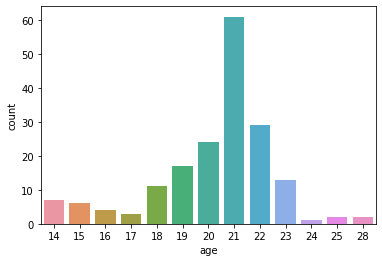

In [13]:
# Generate count plot for age
sns.countplot(x='age', data=df)

The graph above is a countplot of the respondents' ages from our survey. We tried to target mainly young adults, since our research focuses on individuals who grew up or are growing up with social media applications.

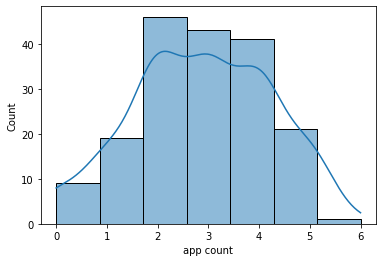

In [14]:
# Generate histogram plot for app count
sns.histplot(df['app count'], bins=7, kde=True);

The histogram above illustrates that the majority of our respondents regularly use 2 to 4 of the top social media applications we listed (Facebook, Instagram, Snapchat, Twitter, TikTok and Reddit).

In [15]:
# Showcase correlation between each variable
df.corr()

,age,use social media,app count,impact,Depression,Anxiety,average hours
age,1.000000,0.102915,0.181497,-0.159554,0.159373,0.017655,-0.076622
use social media,0.102915,1.000000,0.157101,-0.073916,0.060324,-0.086446,0.139682
app count,0.181497,0.157101,1.000000,-0.003878,0.199259,0.137714,0.214826
impact,-0.159554,-0.073916,-0.003878,1.000000,-0.078471,-0.115061,0.043047
Depression,0.159373,0.060324,0.199259,-0.078471,1.000000,0.427984,0.163435
Anxiety,0.017655,-0.086446,0.137714,-0.115061,0.427984,1.000000,0.206367
average hours,-0.076622,0.139682,0.214826,0.043047,0.163435,0.206367,1.000000


The table above shows the Pearson corrleation values between each variable in our dataframe.

The r value of app count and Depression is 0.199259, which means that there is a positive correlation between these two. The higher the app count, the more likely an individual is to have Depression. Similarly, the r value for app count and Anxiety is 0.137714. Although this value is slightly lower, there is still a positive correlation between these two. The higher the app count, the more likely an individual is to have Anxiety.

The r value of average hours and Depression is 0.163435, which again tells us that there is a positive correlation. The correlation between Average hours and Anxiety follows the same pattern but is slightly higher at 0.206367. From these values, we can see that the more hours an individual uses social media on a daily basis, the more likely they are to have Depression and Anxiety.

Text(0.5, 1.0, 'Average Hours Spent on Social Media and Depression')

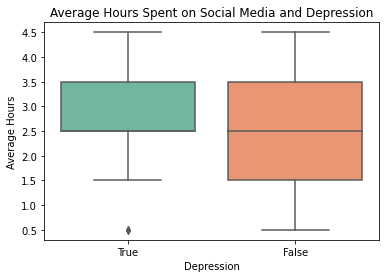

In [16]:
# Generate box plot for depression and average hours
ax1 = sns.boxplot(x='Depression', y='average hours', order=[True, False], data=df, palette='Set2')
ax1.set_ylabel("Average Hours")
ax1.set_title("Average Hours Spent on Social Media and Depression")

The boxplot above compares the distribution of the average hours an individual spends on social media between those who have Depression and those who do not. It shows us that the first quartile and the minimum of the set of respondents who have Depression is higher than that of those who don't. This can potentially indicate that the more hours one spends on social media, the more likely they are to have Depression.

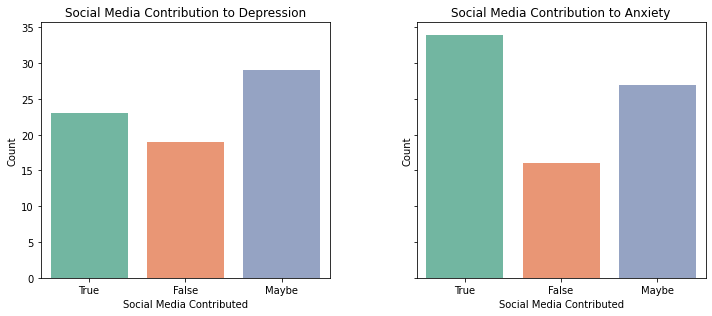

In [17]:
# Generate two count plots for contribution of social media to anxiety and depression
fig, ax = plt.subplots(1,2,sharey=True,figsize=(10,4.5))

# Depression countplot
ax1 = sns.countplot(x='SM contributed', data=df[df['Depression'] == True], ax=ax[0], order=[True, False, 'Maybe'], palette='Set2')
ax1.set_title('Social Media Contribution to Depression')
ax1.set_ylabel('Count')
ax1.set_xlabel('Social Media Contributed')

# Anxiety countplot
ax2 = sns.countplot(x='SM contributed', data=df[df['Anxiety'] == True], ax=ax[1], order=[True, False, 'Maybe'], palette='Set2')
ax2.set_title('Social Media Contribution to Anxiety')
ax2.set_ylabel('Count')
ax2.set_xlabel('Social Media Contributed')

fig.tight_layout()
plt.subplots_adjust(wspace=0.3)

The plots above demonstrate the count of people who have Depression/Anxiety and whether or not they believed that social media had contributed to their respective mental health disorders. Although many answered Maybe, more respondents answered that they felt social media contributed to their mental health disorders than not, especially those with Anxiety.

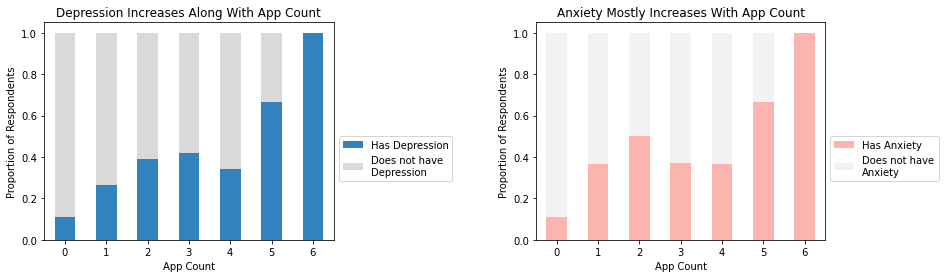

In [18]:
fig, ax = plt.subplots(1,2,figsize=(14,4))

# Create stacked data frame for depression and app count
df2 = df.groupby(['Depression','app count'])['Depression'].count().unstack('app count').fillna(0)
sub_df2 = np.transpose(df2.div(df2.sum()))
columns_titles = [True,False]
sub_df2 = sub_df2.reindex(columns=columns_titles)

# Generate depression plot
ax1 = sub_df2.plot(kind='bar', stacked=True, rot=0, colormap='tab20c',
                  title='Depression Increases Along With App Count', ax=ax[0])

# Customize depression plot
ax1.legend(('Has Depression','Does not have\nDepression'), loc='best', bbox_to_anchor=(1.0, 0.5))
ax1.set_ylabel("Proportion of Respondents");
ax1.set_xlabel("App Count")

# Create stacked data frame for anxiety and app count
df2 = df.groupby([ 'Anxiety','app count'])['Anxiety'].count().unstack('app count').fillna(0)
sub_df2 = np.transpose(df2.div(df2.sum()))
columns_titles = [True,False]
sub_df2 = sub_df2.reindex(columns=columns_titles)

# Generate anxiety plot
ax2 = sub_df2.plot(kind='bar', stacked=True, rot=0, colormap='Pastel1',
                  title='Anxiety Mostly Increases With App Count', ax=ax[1])

# Customize anxiety plot
ax2.legend(('Has Anxiety','Does not have\nAnxiety'), loc='best', bbox_to_anchor=(1.0, 0.5))
ax2.set_ylabel("Proportion of Respondents");
ax2.set_xlabel("App Count")

plt.subplots_adjust(wspace=0.7)

The stacked barplots above illustrate the positive correlation that App Count has with Depression and Anxiety, respectively. They show that the groups of individuals who use more social media applications regularly have more cases of Depression and Anxiety. Although there are slight dips, there is an overall increasing trend.

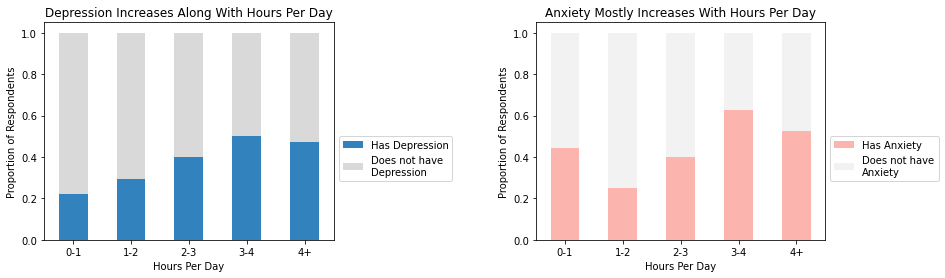

In [19]:
fig, ax = plt.subplots(1,2,figsize=(14,4))

# Create stacked data frame for depression and hours per day
df2 = df.groupby(['Depression','hours per day'])['Depression'].count().unstack('hours per day').fillna(0)
sub_df2 = np.transpose(df2.div(df2.sum()))
columns_titles = [True,False]
sub_df2 = sub_df2.reindex(columns=columns_titles)

# Generate depression plot
ax1 = sub_df2.plot(kind='bar', stacked=True, rot=0, animated=True, colormap='tab20c',
                  title='Depression Increases Along With Hours Per Day', ax=ax[0])

# Customize depression plot
ax1.legend(('Has Depression','Does not have\nDepression'), loc='best', bbox_to_anchor=(1.0, 0.5))
ax1.set_ylabel("Proportion of Respondents");
ax1.set_xlabel("Hours Per Day")

# Create stacked data frame for anxiety and hours per day
df2 = df.groupby([ 'Anxiety','hours per day'])['Anxiety'].count().unstack('hours per day').fillna(0)
sub_df2 = np.transpose(df2.div(df2.sum()))
columns_titles = [True,False]
sub_df2 = sub_df2.reindex(columns=columns_titles)

# Generate anxiety plot
ax2 = sub_df2.plot(kind='bar', stacked=True, rot=0, colormap='Pastel1',
                  title='Anxiety Mostly Increases With Hours Per Day', ax=ax[1])

# Customize anxiety plot
ax2.legend(('Has Anxiety','Does not have\nAnxiety'), loc='best', bbox_to_anchor=(1.0, 0.5))
ax2.set_ylabel("Proportion of Respondents");
ax2.set_xlabel("Hours Per Day")

plt.subplots_adjust(wspace=0.7)

The visuals above demonstrate the correlation between the amount of hours an individual uses social media per day and the proportion of the respondents who have Depression or Anxiety, respectively. The left plot shows a positive trend between Depression and Hours Per Day. This indicates that the respondents that used social media for more hours daily experienced Depression at a higher count than those who used social media for shorter amounts of time. The graph on the right has a few peaks along the way, but demonstrates a similar trend since those with more daily hours have higher counts of Anxiety than those with less hours. The exception being the group of respondents who answered 0-1 hours of use. In both graphs we can see a peak at 3-4 hours, which indicates that those individuals who use social media for that amount of time on a daily basis tend to have higher levels of Depression and Anxiety.

### The following cells will perform Logistic Regression on the app count/average hours variables with Depression/Anxiety outcomes:

In [20]:
df.head()

,gender,age,use social media,hours per day,days per week,check morning,check night,app count,start using,impact,suicidal thoughts,SM contributed,Depression,Anxiety,average hours
0,Female,22,True,2-3,3-5,True,False,2,Middle School,6,True,Maybe,True,True,2.5
1,Female,22,True,1-2,7,False,True,4,High School,7,False,Maybe,True,True,1.5
2,Female,21,True,4+,7,True,True,4,Elementary School,5,False,True,True,False,4.5
3,Female,19,True,4+,3-5,True,True,4,Elementary School,3,True,True,True,True,4.5
4,Female,21,True,2-3,7,True,True,2,High School,4,False,True,False,False,2.5


In [21]:
# Shuffle dataset
df = df.sample(n=df.shape[0], random_state = 10)
df.reset_index(drop=True, inplace=True)

# Only keep columns that we want to analyze in our model and convert categorical features (Not including 'start using' because it results in a lower accuracy score for our models)
gender = pd.get_dummies(df['gender'])

df_apps_depression = df[['age', 'app count', 'Depression']]
df_apps_depression = pd.concat([df_apps_depression,gender],axis=1)

df_apps_anxiety = df[['age', 'app count', 'Anxiety']]
df_apps_anxiety = pd.concat([df_apps_anxiety,gender],axis=1)

df_hours_depression = df[['age', 'average hours', 'Depression']]
df_hours_depression = pd.concat([df_hours_depression,gender],axis=1)

df_hours_anxiety = df[['age', 'average hours', 'Anxiety']]
df_hours_anxiety = pd.concat([df_hours_anxiety,gender],axis=1)

In [22]:
# Split datasets into training/testing
num_training = int(df.shape[0] * 0.8)
num_testing = int(df.shape[0] * 0.2)

train_X_apps_depression = df_apps_depression[:num_training].drop('Depression', axis=1)
test_X_apps_depression = df_apps_depression[-num_testing:].drop('Depression', axis=1)
train_y_apps_depression = df_apps_depression[:num_training]['Depression']
test_y_apps_depression = df_apps_depression[-num_testing:]['Depression']

train_X_apps_anxiety = df_apps_anxiety[:num_training].drop('Anxiety', axis=1)
test_X_apps_anxiety = df_apps_anxiety[-num_testing:].drop('Anxiety', axis=1)
train_y_apps_anxiety = df_apps_anxiety[:num_training]['Anxiety']
test_y_apps_anxiety = df_apps_anxiety[-num_testing:]['Anxiety']

train_X_hours_depression = df_hours_depression[:num_training].drop('Depression', axis=1)
test_X_hours_depression = df_hours_depression[-num_testing:].drop('Depression', axis=1)
train_y_hours_depression = df_hours_depression[:num_training]['Depression']
test_y_hours_depression = df_hours_depression[-num_testing:]['Depression']

train_X_hours_anxiety = df_hours_anxiety[:num_training].drop('Anxiety', axis=1)
test_X_hours_anxiety = df_hours_anxiety[-num_testing:].drop('Anxiety', axis=1)
train_y_hours_anxiety = df_hours_anxiety[:num_training]['Anxiety']
test_y_hours_anxiety = df_hours_anxiety[-num_testing:]['Anxiety']

In [23]:
# Fit training data on logistic regression models
clf_apps_depression = LogisticRegression(max_iter=1000, fit_intercept=False).fit(train_X_apps_depression, train_y_apps_depression)
clf_apps_anxiety = LogisticRegression(max_iter=1000, fit_intercept=False).fit(train_X_apps_anxiety, train_y_apps_anxiety)
clf_hours_depression = LogisticRegression(max_iter=1000, fit_intercept=False).fit(train_X_hours_depression, train_y_hours_depression)
clf_hours_anxiety = LogisticRegression(max_iter=1000, fit_intercept=False).fit(train_X_hours_anxiety, train_y_hours_anxiety)

Here, we are training four models with data to get the overall influence of the features on the outcome(s). The features in this case being an individual's identity (age and gender), as well as either App Count or Average Hours, and the outcome being Depression or Anxiety, depending on the model.

In [24]:
# Prediction results for app count and depression
pred_apps_depression = clf_apps_depression.predict(test_X_apps_depression)
print(classification_report(test_y_apps_depression,pred_apps_depression))

              precision    recall  f1-score   support

       False       0.67      1.00      0.80        20
        True       1.00      0.38      0.55        16

    accuracy                           0.72        36
   macro avg       0.83      0.69      0.67        36
weighted avg       0.81      0.72      0.69        36



In [25]:
# Prediction results for avg hours and depression
pred_hours_depression = clf_hours_depression.predict(test_X_hours_depression)
print(classification_report(test_y_hours_depression,pred_hours_depression))

              precision    recall  f1-score   support

       False       0.59      1.00      0.74        20
        True       1.00      0.12      0.22        16

    accuracy                           0.61        36
   macro avg       0.79      0.56      0.48        36
weighted avg       0.77      0.61      0.51        36



In [26]:
# Prediction results for app count and anxiety
pred_apps_anxiety = clf_apps_anxiety.predict(test_X_apps_anxiety)
print(classification_report(test_y_apps_depression,pred_apps_anxiety))

              precision    recall  f1-score   support

       False       0.72      0.90      0.80        20
        True       0.82      0.56      0.67        16

    accuracy                           0.75        36
   macro avg       0.77      0.73      0.73        36
weighted avg       0.76      0.75      0.74        36



In [27]:
# Prediction results for avg hours and anxiety
pred_hours_anxiety = clf_hours_anxiety.predict(test_X_hours_anxiety)
print(classification_report(test_y_hours_depression,pred_hours_anxiety))

              precision    recall  f1-score   support

       False       0.71      0.85      0.77        20
        True       0.75      0.56      0.64        16

    accuracy                           0.72        36
   macro avg       0.73      0.71      0.71        36
weighted avg       0.73      0.72      0.72        36



The values above indicate that our Logistic Regression models were trained well enough to receive an average accuracy of about 0.7675, which is pretty good considering the size of our training set.

In [28]:
# Feature weights (with app count) on Depression
weights_app_depression = list(zip(clf_apps_depression.coef_.tolist()[0], ['age', 'app count'] + list(gender)))
weights_app_depression.sort()
weights_app_depression_df = pd.DataFrame(weights_app_depression, columns=['Weight', 'Feature'])
weights_app_depression_df.style.set_caption("Feature Weights with App Count on Depression")

,Weight,Feature
0,-1.28183,Male
1,-0.488441,Female
2,-0.0100955,age
3,0.196021,app count
4,0.413077,Other


The DataFrame above describes all of the feature weights, including the individual's identity and their app count on the outcome of whether they have Depression or not. App Count has a positive weight, which indicates that as app count increases, the individual is more likely to have Depression.

In [29]:
# Feature weights (with average hours) on Depression
weights_hours_depression = list(zip(clf_hours_depression.coef_.tolist()[0], ['age', 'average hours'] + list(gender)))
weights_hours_depression.sort()
weights_hours_depression_df = pd.DataFrame(weights_hours_depression, columns=['Weight', 'Feature'])
weights_hours_depression_df.style.set_caption("Feature Weights with Average Hours on Depression")

,Weight,Feature
0,-1.30032,Male
1,-0.4391,Female
2,0.0149571,age
3,0.0194746,average hours
4,0.448817,Other


The DataFrame above describes all of the feature weights, including the individual's identity and their average hours spent daily on social media on the outcome of whether they have Depression or not. Average Hours has a small positive weight, which indicates that as the average hours increase, the individual is more likely to have Depression, but is not as strong as the weight of App Count on Depression.

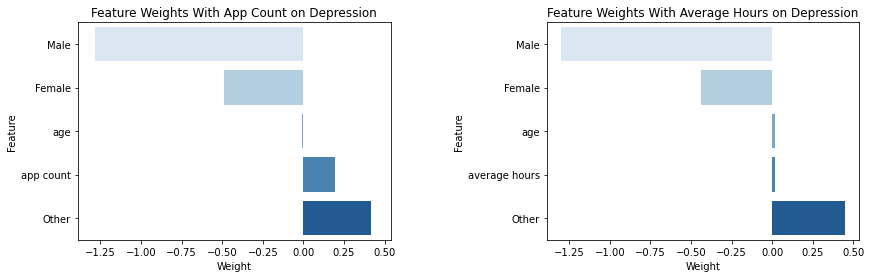

In [30]:
fig, ax = plt.subplots(1,2,figsize=(14,4), sharex=True)

# Plot feature weights for app count
ax1 = sns.barplot(x='Weight', y='Feature', data=weights_app_depression_df, palette='Blues', ax=ax[0])
ax1.set_title("Feature Weights With App Count on Depression")

# Plot feature weights for avg hours
ax2 = sns.barplot(x='Weight', y='Feature', data=weights_hours_depression_df, palette='Blues', ax=ax[1])
ax2.set_title("Feature Weights With Average Hours on Depression")

plt.subplots_adjust(wspace=0.5)

The plots above are visualizations of the previous two DataFrames. They both demonstrate that Males are less likely to have Depression than Females and any other gender appears to experience Depression at much higher rates. The important thing to take out of these plots is that App Count and Average Hours both have a positive weight, which means that they have a positive correlation with Depression. App Count has a slightly higher weight than Average Hours, thus App Count has a greater influence on Depression.

In [31]:
# Feature weights (with app count) on Anxiety
weights_app_anxiety = list(zip(clf_apps_anxiety.coef_.tolist()[0], ['age', 'app count'] + list(gender)))
weights_app_anxiety.sort()
weights_app_anxiety_df = pd.DataFrame(weights_app_anxiety, columns=['Weight', 'Feature'])
weights_app_anxiety_df.style.set_caption("Feature Weights with App Count on Anxiety")

,Weight,Feature
0,-0.932644,Male
1,-0.017952,age
2,0.167963,Female
3,0.190773,app count
4,0.909092,Other


The DataFrame above describes all of the feature weights, including the individual's identity and their amount of social media applications, on the outcome of whether they have Anxiety or not. App Count has a positive weight, which indicates that as one's social media app count increases, they are more likely to have Anxiety.

In [32]:
# Feature importance (with average hours) on Anxiety
weights_hours_anxiety = list(zip(clf_hours_anxiety.coef_.tolist()[0], ['age', 'average hours'] + list(gender)))
weights_hours_anxiety.sort()
weights_hours_anxiety_df = pd.DataFrame(weights_hours_anxiety, columns=['Weight', 'Feature'])
weights_hours_anxiety_df.style.set_caption("Feature Weights with Average Hours on Anxiety")

,Weight,Feature
0,-0.959058,Male
1,-0.00328282,age
2,0.101804,average hours
3,0.145687,Female
4,0.880469,Other


The DataFrame above describes all of the feature weights, including the individual's identity and the average amount of hours they spend on social media applications daily, on the outcome of whether they have Anxiety or not. Avg hours has a positive weight, which indicates that as one's social media usage increases, they are more likely to have Anxiety. It has a higher weight than App Count, which means a high Avg Hours value is a stronger indicator that the individual has Anxiety than their App Count.

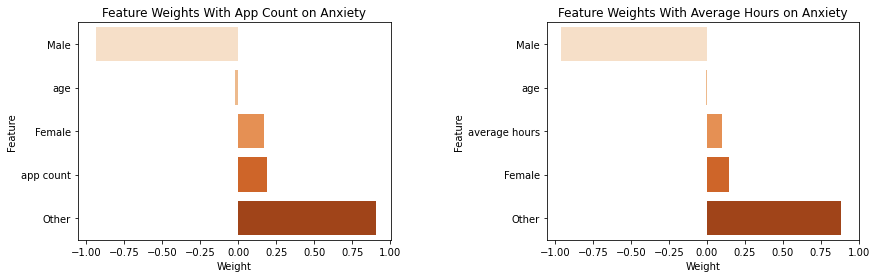

In [33]:
fig, ax = plt.subplots(1,2,figsize=(14,4), sharex=True)

# Plot feature weights for app count
ax1 = sns.barplot(x='Weight', y='Feature', data=weights_app_anxiety_df, palette='Oranges', ax=ax[0])
ax1.set_title("Feature Weights With App Count on Anxiety")

# Plot feature weights
ax2 = sns.barplot(x='Weight', y='Feature', data=weights_hours_anxiety_df, palette='Oranges', ax=ax[1])
ax2.set_title("Feature Weights With Average Hours on Anxiety")

plt.subplots_adjust(wspace=0.5)

The plots above are visualizations of the previous two DataFrames. They both demonstrate that Males are less likely to have Anxiety than Females and any other gender appears to experience Anxiety at much higher rates. Being Female also has a positive weight on Anxiety. The important thing to take out of these plots is that App Count and Average Hours have a positive weight, similar to the Depression plots, which means that they have a positive correlation with Anxiety, and Average Hours has a slightly higher weight than App Count, thus Average Hours has a greater influence on Anxiety.

In [34]:
# Get all weights we want to compare
feat_weights = pd.DataFrame()
feat_weights = feat_weights.append(weights_hours_anxiety_df[weights_hours_anxiety_df['Feature'] == 'average hours'], ignore_index=True)
feat_weights.loc[0, 'Feature'] = 'Hours Impact \n on Anxiety'
feat_weights = feat_weights.append(weights_app_anxiety_df[weights_app_anxiety_df['Feature'] == 'app count'], ignore_index=True)
feat_weights.loc[1, 'Feature'] = 'App Count \n Impact on \n Anxiety'
feat_weights = feat_weights.append(weights_hours_depression_df[weights_hours_depression_df['Feature'] == 'average hours'], ignore_index=True)
feat_weights.loc[2, 'Feature'] = 'Hours Impact \n on Depression'
feat_weights = feat_weights.append(weights_app_anxiety_df[weights_app_anxiety_df['Feature'] == 'app count'], ignore_index=True)
feat_weights.loc[3, 'Feature'] = 'App Count \n Impact on \n Depression'
feat_weights.sort_values(by='Weight', inplace=True, ascending=False)

Text(0.5, 1.0, 'Feature Weights')

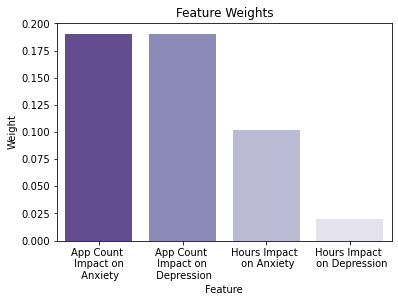

In [35]:
# Plot the weights
ax = sns.barplot(y='Weight', x='Feature', data=feat_weights, palette='Purples_r')
ax.set_title('Feature Weights')

The bar plot above illustrates the weights of Average Hours and App Count on Depression and Anxiety. From this, we can see that the Average Hours feature on Anxiety has the highest weight, which indicates that the amount of time an individual spends on social media daily has the greatest impact on whether they have Anxiety. This is followed by the impact that the amount of social media apps has on whether an individual has Anxiety and Depression. Lastly, the smallest weight is that of Average Hours on Depression. However, it is important to note that all of these weights are positive, meaning that as one's app count and average hours spent on social media increases, so does their likelihood of being Depressed and/or having Anxiety.

# Ethics & Privacy

Our survey explicitly stated the intentions for the data collection and that all answers are anonymous. We also stated on our social media platforms that we planned to use the data for our class project. We thus received consent and respected the privacy of each responder.

# Conclusion & Discussion

Conclusion: Our results demonstrate that there is a correlation in between social media usage and mental health disorders. There is a correlation between app count and depression disorder as well as anxiety disorder. Similarly, there is also a correlation between number of hours spent on social media and depression disorder as well as anxiety disorder.

Discussion: We believe that we learned a lot about the data science process through this project. Coming into this class none of us had done anything which resembled this assignment. We have prior experience in coding but not with using pandas or working with data in this specific format. This turned out to be our biggest limitation as we went to gather our own data through the use of a survey. We asked good questions but since we weren't familiar with which data types were the most useful to work with in Pandas we definitely made some mistakes on the input types we took from the survey. We think if we were to continue research into this field the area where we could make the largest improvement is data gathering. Also to improve our machine learning model a larger response size we think would be able to improve the accuracy. Another limitation was our inability to gather clinical data from our survey responders. We had to trust that their self report was accurate in some way. Many people simply do not have access to any medical professionals who could give them clinical diagnoses for their mental health. It is still likely that some of them in the data set have been clinically diagnose. We felt it was too intrusive to do demand a legitimate dianoses from a doctor. We still agreed that any report of mental health issues should be taken into consideration.

# Team Contributions

Daniela Molina: Primarily responsible for a majority of the code work in the project. She was essential to helping sort through and interpret the data during the EDA phase and a huge help overall to the team.

Gabriel Beal: Took on a more leadership role and helped with delegating the work and organizing the group meetings. Helped out Dani on the coding, Marc with the writeup, and Haoxuan with the video portion. 

Marc Isaia: In charge of the final writeup and interpretation. Has the most experience writing reports so he took the lead on a majority of the writing portions.

Haoxuan Cui: Took lead on the video section of the final project. Organized the slides and the script.